In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import ridge_logistic as r

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *


In [2]:
def read_data(data_file_name):
    prob_y = []
    prob_x = []
    for line in open(data_file_name):
        line = line.split(None, 1)
        # In case an instance with all zero features
        if len(line) == 1: line += ['']
        label, features = line
        xi = {}
        for e in features.split():
            ind, val = e.split(":")
            xi[int(ind)] = float(val)
        prob_y += [float(label)]
        prob_x += [xi]
    d = max([max(x.keys()) for x in prob_x])
    X = []
    for f in prob_x:
        x = np.zeros(d)
        for k,v in f.items():
            x[k-1] = v
        X.append(x)
    
    return (np.array(prob_y),np.array(X))

In [3]:
[b, A] = read_data('datasets/a9a.txt')
n, d = A.shape
A = np.hstack((np.ones((n,1)), A))
d = d+1
A = A / np.sqrt((A**2).sum(axis=0))

In [4]:
rl = r.Ridge_Logistic_Regression(0.1)
st = 5 # stop time
ss = 20*d  # sampling size
lambd = 0.1
alpha = 0.5
w, t = newton(A, b, np.zeros(d), rl, 0.1, 15)
w_stars = w[len(t)-1]

Newton computation time: 15.501786947250366


In [5]:
w0, t0 = newton(A, b, np.zeros(d), rl, lambd, st)
w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, st, ss)
w2, t2 = gd(A, b, np.zeros(d), rl, lambd, st, alpha)
w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, st, alpha)
w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, st, ss)

Newton computation time: 5.148059844970703
Sub-sampled Newton rnss computation time: 5.0016539096832275
GD computation time: 5.003710031509399
Nesterov GD computation time: 5.001619100570679
Nesterov Sub-sampled Newton rnss computation time: 5.087488889694214


In [6]:
def compute_w_gaps(w, t, w_stars):
    w_gaps = []
    for i in range(len(t)):
        w_gaps_tmp = []
        for k in range(len(t[i])):
            w_gaps_tmp.append(np.linalg.norm(w[i][k] - w_stars))           
        w_gaps.append(w_gaps_tmp) 
    return w_gaps

In [7]:
def plot_graph(x, y, xl, yl):
    fig = plt.figure(figsize=(12, 6)) # set figure size
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.yscale('log')
    plt.plot(x[0], y[0], label='Newton') 
    plt.plot(x[1], y[1], label='Sub-sampled Newton') 
    plt.plot(x[2], y[2], label='GD') 
    plt.plot(x[3], y[3], label='Nesterov GD') 
    plt.plot(x[4], y[4], label='Nesterov Sub-sampled Newton') 
    plt.legend()

In [8]:
ws = [w0,w1,w2,w3,w4]
ts = [t0,t1,t2,t3,t4]
ts_iter = [np.arange(len(t)) for t in ts]

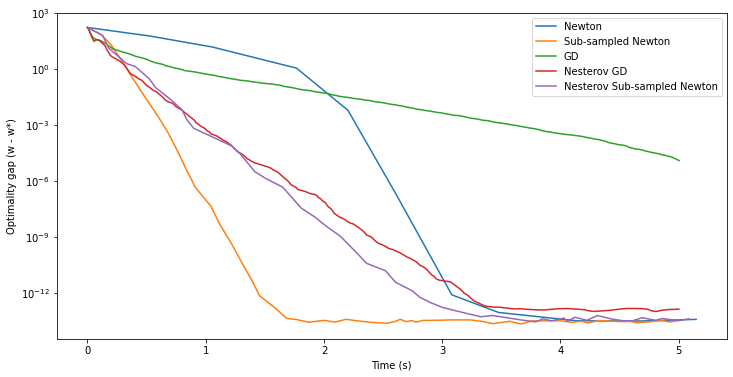

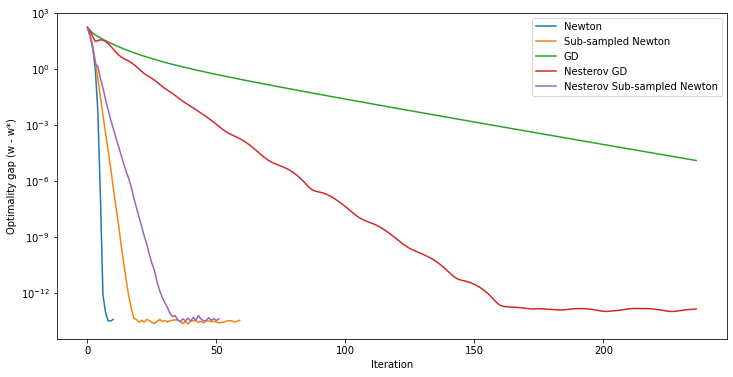

In [9]:
w_gaps = compute_w_gaps(ws, ts, w_stars)
plot_graph(ts, w_gaps, 'Time (s)', 'Optimality gap (w - w*)')
plot_graph(ts_iter, w_gaps, 'Iteration', 'Optimality gap (w - w*)')

In [10]:
def compute_f_gaps(A, b, w, t, w_stars, rl):
    f_gaps = []
    f_stars = rl.loss(A, b, w_stars)
    for i in range(len(t)):
        f_gaps_tmp = []
        for k in range(len(t[i])):
            f_gaps_tmp.append(rl.loss(A, b, w[i][k]) - f_stars)           
        f_gaps.append(f_gaps_tmp) 
    return f_gaps

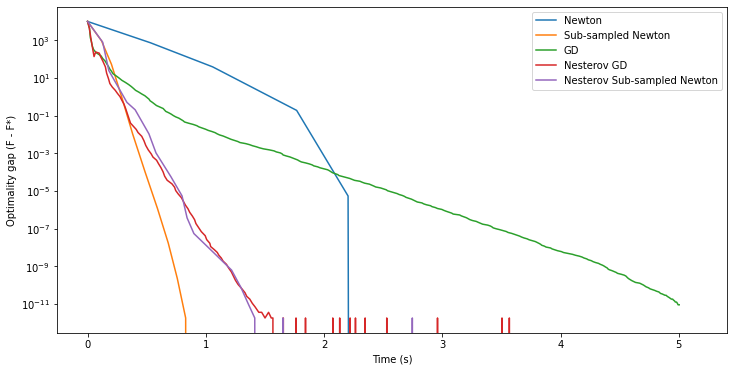

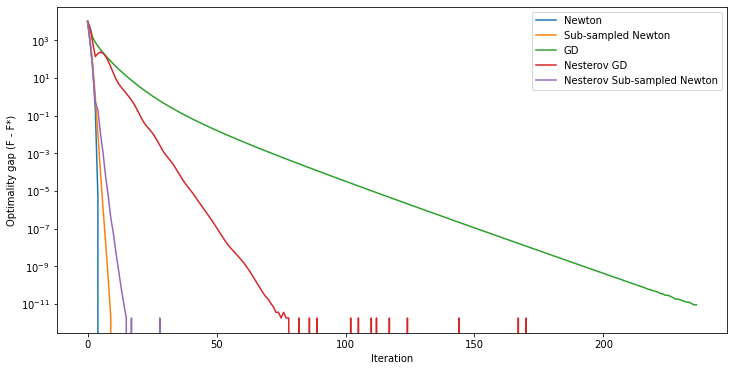

In [16]:
f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, rl)
plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)')
plot_graph(ts_iter, f_gaps, 'Iteration', 'Optimality gap (F - F*)')

In [33]:
lambdas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
cns = []
for l in lambdas:
    cn = r.Ridge_Logistic_Regression(l).condition_num(A, b, np.zeros(d))
    cns.append(cn)
print(cns)

[745.2388907091175, 373.1194453545303, 75.42388907090182, 38.21194453545064, 8.442388907090091, 4.721194453545048, 1.744238890709009, 1.372119445354505]


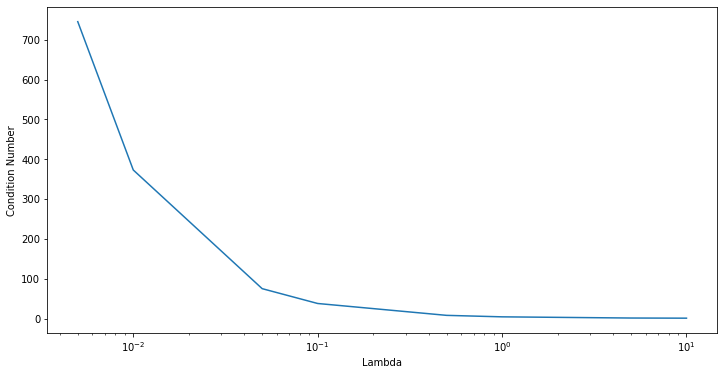

In [38]:
fig = plt.figure(figsize=(12, 6)) # set figure size
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Condition Number')
plt.plot(lambdas, cns)